In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from random import random
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
#from scipy.special import erf
import pandas as pd
import holoviews as hv
hv.extension('bokeh')
from holoviews import streams

Ds = {'Hidrogeno': 6.4E-5,
      'Oxigeno': 1.8E-4,
        'Alcohol': 1.0E-4,
        'Benceno': 8.8E-6,

        'Azucar': 3.6E-9,
        'Sal': 1.1E-9,
        'Alcohol2': 8.0E-10}

# Go to: [Simulated data](#Simulated-data)

# The diffusion equation
The one-dimensional diffusion equation or Fick's second law is
$$
\frac{\partial c}{\partial t}=\frac{\partial }{\partial x}\left(D\frac{\partial c}{\partial x}\right)
$$
It can be solved for the spatially and temporally varying concentration $c(x,t)$ with sufficient inital and boundary conditions. 

However, an interesting case is that of a constant diffusion coefficient $D$
$$
\frac{\partial c}{\partial t}=D\frac{\partial^2 c}{\partial x^2}
$$
Which solution depends critically on initial and boundary conditions specific to the problem at hand.

## Elementary solution
The instantaneous, localized release of a sustance in an infinite domain initially free of the sustance.  

Matematically, we have:
- Infinite doman $-\infty < x < +\infty$,
- D = constant,
- No initial concentration, except for the localized release: $c_0(x)=M\delta (x)  \text{ at }t=0$,
- It will take the sustance an infinite time to rech the infinitely far ends of the foman, so: $\lim_{x\to +\infty}c=\lim_{x\to -\infty}c=0 \text{ at } (t<\infty)$

Here, $M$ is the total mass of the substance per unit cross-sectional area, and $\delta(x)$ is the  
Dirac function
$$
\delta(x)=
\begin{cases} 
0 & \text{if $x \neq 0$},\\
+\infty & \text{if $x = 0$}.
\end{cases}
$$
and the area under the infinitely tall and infinitely narrow peak is unity.

Which has the solution:
$$
c(x,t) = At^{-1/2}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}.
$$
That meets the boundary conditions (vanishing concentrations far away on both sides). Then, the remaining, initial condition determines the constant of integration. Conservation of the total amount of the substance requires that
$$
\int_{-\infty}^{+\infty}c(x,t) dx=\int_{-\infty}^{+\infty}c_0(x)dx=M
$$
at all times. Therefore, we get: $A=M/\sqrt{4\pi D}$.  

And the final solution is:
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}
$$

Kronecker delta

$$
\delta_{ij}=
\begin{cases} 
0 & \text{if $i \neq j$},\\
1 & \text{if $i = j$}.
\end{cases}
$$

In [ ]:
def n_1d(mass, D, x, t):
    """
    M mass
    D diffusion rate
    """
    return (mass/(2*np.sqrt(np.pi * D * t))) * np.exp(pow(-x,2)/(4*D*t))

# from Cushman chp. 2
def n(x, t, D):
    return np.exp(-x * x / (4 * D * t)) / (2*np.sqrt(np.pi * D * t))

def msd_1d(D, t):
    return 2*D*t

def c_1d(mass, D, x, t):
    return (mass/np.sqrt(4*np.pi*D*t))*np.exp(-((x*x)/(4*D*t)))

def n_2d():
    pass

Ds = {'Hidrogen':0.64E-4, 'Oxigen':0.18E-4, 'Alcohopl':0.1E-4,
      'Benceno':0.08E-4, 'Sugar':0.36E-9, 'Salt':1.10E-9, 'Alcohol':0.8E-9}

In [ ]:
t = 1
x = 0
c0 = 7.5E-4
n_1d(c0, Ds['Salt'], x, t), msd(Ds['Salt'],t), c_1d(c0, Ds['Salt'], x, t)

In [ ]:

xs = np.linspace(-.5, .5, 10000)
escalaX = 100.
escalaY = .1

ns = n(xs, .1, Ds['Azucar'])

fig = plt.figure()
plt.axis([-.5, .5, 0, 200])

plt.plot(xs * escalaX, ns * escalaY)
plt.show(fig)

### Example 
from [Cushman 2012 ch 2](http://www.dartmouth.edu/~cushman/courses/engs43/Chapter2.pdf)

A tank aboard a barge traveling along the Chicago Ship Canal suddenly
collapses, releasing its benzene content ($C_6H_6$, density = $0.879 g/cm^3$), of which 100 liters find their way quickly to the water. The rest of the benzene remains contained on the barge.  
Assuming rapid mixing across the canal section (8.07m deep and 48.8 m wide) and estimating the turbulent diffusion coefficient at $3.0 m^2/s$, what are the concentrations of benzene 2, 6, 12 and 24 hours after the accident, at the site of the spill and 300 m away?  
  
  To solve this problem, we first determine the mass of benzene that was spilled. Since the density of benzene is 0.879 g/cm3 = 0.879 kg/L, this mass $m$ is:
$$m = \text{mass} \times \text{volume}$$

In [ ]:
density = 0.879  # 0.879 g/cm^3 = 0.879 kg/L
volume = 100 # liters
D = 3

m = density * volume
print(f'm = {m} Kg')

deep = 8.07
wide = 48.8

area = deep * wide
print(f'area = {area} m^2')

Over the cross-section of the canal, we have

In [ ]:
# Mass spilled
M = m/area
print(f'M = {M:.4f} kg/m^2')

Because concentration over time is given by
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}
$$
At the site of the spill $(x=0)$ the equation becomes
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}
$$
which yields:

In [ ]:
t = 1e-9
concentration_at_1_sec = 1/np.sqrt(4*np.pi*D*t)
print(f'c(0, t={t} sec)={concentration_at_1_sec * M: .4f} kg/m^3 or {concentration_at_1_sec * 100:.2f}% of the original Mass')

Comparison of concentration close to the place of the spill at 3 instants

In [ ]:
ts = [1e-3, 1e-2, 0.1]
xs = np.linspace(-4,4,100)
M_total = None
for t in ts:
    cs = np.exp(-np.power(xs,2)/(4*D*t))/np.sqrt(4*np.pi*D*t)
    #if M_total is None:
    M_total = cs.sum()
    plt.plot(xs,cs/M_total)


In [ ]:
# concentration after 1 hour
seconds = 3600
c_at_1_hr = concentration_at_1_sec/np.sqrt(seconds)
print(f'c(0, t=1 hr)= {c_at_1_hr*M*1000:.3f} mg/L or {c_at_h:.4f}% of M')
print(f'c(0, t=1 hr)= {c_at_1_hr*M:.6f} kg/L or {c_at_h:.4f}% of M')

In [ ]:
# concentration at 4 instants
hours = [2, 6, 12, 24]
c_at_hs = {}
for h in hours:
    if h not in c_at_hs:
        c_at_hs[h] = c_at_1_hr/np.sqrt(h)
    print(f'c(0,t={h} hrs)={c_at_hs[h]*M*1000:.3f} mg/L or {c_at_hs[h]:.4f}% of M')

Then, 2, 6, 12, and 24 hours after the spill, at 300 mts, we have:

In [ ]:
x = 300
t = 3600
# the expected time to displace X distance?
x_in_1hr = (x*x)/(4*D*t)

In [ ]:
hours = [2, 6, 12, 24]
c_at_hs_at_300 = {}

for h in hours:
    if h not in c_at_hs_at_300:
        # concentration at N hours * 
        c_at_hs_at_300[h] = c_at_hs[h] * np.exp(-x_in_1hr/h)
    print(f'c(x={x},t={h} hrs)={c_at_hs_at_300[h]*M*1000:.4f} mg/L or {c_at_hs_at_300[h]:.6f}% of M')

## 2D case

Now, the diffusion equation in 2D form can be written as follows,
$$
D_x\frac{\partial^2 c}{\partial x^2}+D_y\frac{\partial^2 c}{\partial y^2}=\frac{\partial^2 c}{\partial t}
$$

The solution of the diffusion equation will give us the spatial and temporal distribution concentration in the unbounded domain.

For the unbounded domain, the initial and boundary condition are,

### Initial Conditions
$$
C(x=0, y=0, t=0) = M\delta(x,y)
$$

Where $\delta$ is the Kronecker delta. 
$$
\delta(x, y) = \begin{cases}
0 & \text{for $x, $y} \neq \text{0 and}\\
1 & \text{for $x, $y = 0}.
\end{cases}
$$

### Boundary conditions
$$
\begin{align}
\text{When } x\to \pm \infty && \frac{\partial c}{\partial x}, c \to 0 \\
\text{When } y\to \pm \infty && \frac{\partial c}{\partial y}, c \to 0
\end{align}
$$

Which can be solved by using separation of variables. Considering that
$$
C(x, y, t) = C_1 (x, t)C_2(y, t)
$$

Since $C_1 \neq 0$ and $C_2 \neq 0$. Thus,
$$
\frac{\partial c_1}{\partial t}-D_x\frac{\partial^2 c_1}{\partial x^2}=0 \\
\frac{\partial c_2}{\partial t}-D_y\frac{\partial^2 c_2}{\partial y^2}=0
$$
Their solutions are
$$
c_1(x,t) = \frac{a}{\sqrt{4\pi D_xt}}\text{exp}^{-\left(- \frac{x^2}{4D_xt}\right)} \\
c_2(y,t) = \frac{\beta}{\sqrt{4\pi D_yt}}\text{exp}^{-\left(- \frac{x^2}{4D_xt}\right)}
$$

Thus,
$$
c(x, y, t) = \left(\frac{M}{4\pi t \sqrt{D_xD_y}}\right)\text{exp}^{-\left(\frac{x^2}{4D_xt} + \frac{y^2}{4D_yt}\right)}
$$
$$
c(x, y, t) = \left(\frac{M}{4\pi t \sqrt{D_xD_y}}\right)\text{exp}^{-\frac{1}{4t}\left(\frac{x^2}{D_x} + \frac{y^2}{D_y}\right)}
$$

This is the solution of the two dimensional diffusion equation for the case of instantaneous loading at x = 0, y = 0 and at t = 0.

## EVs

When water is the ambient fluid, concentration is often expressed in moles of the substance per liter ($ 1\text{L} = 10^{-3} m^3$) of solution. One mole comprises 6.02 × 1023 atoms or molecules of that substance.  
The advantage of using molarity is the ease of translation from chemical reactions at the molecular level to mass budgets at the macroscopic scale: one molecule simply becomes one mole.  
To convert moles into grams, one multiplies by the molecular weight of the substance. Example: The mass of 1 mole of ammonia (NH3) is 14+3×1 = 17 g. ([Cushman 2012 p.9](http://www.dartmouth.edu/~cushman/courses/engs43/Chapter1.pdf))

### Analytical concentration
A

In [ ]:
M = 100e3
ts = [1e-6, 1e-2, 0.1]
xs = np.linspace(-4,4,100)
M_total = None
for t in ts:
    cs = np.exp(-np.power(xs,2)/(4*D*t))/np.sqrt(4*np.pi*D*t)
    #if M_total is None:
    #c_total = cs.sum()
    plt.plot(xs,(cs/cs.sum())*M)
    print(f'at t={t} cs.sum()={cs.sum()/cs.sum()*M} max={cs.max()/cs.sum()*M}')
plt.axis([-4,4,0,10000])

In [ ]:
((cs/cs.sum())*M).sum(),

# Fick's 2nd law of diffusion

In [19]:
def erfcc(x):
    # función complementaria 1-erf(x)
    # double t,z,ans;
    z = np.abs(x)
    t = 1.0 / (1.0 + 0.5 * z)
    ans = t * np.exp(-z * z - 1.26551223 + t * (1.00002368 + t * (0.37409196 + t * (
        0.09678418 + t * (-0.18628806 + t * (0.27886807 + t * (-1.13520398 + t * (
            1.48851587 + t * (-0.82215223 + t * 0.17087277)))))))))
    return ans if x >= 0.0 else 2.0 - ans


# método de Simpson
def integral(a, b, n):
    if n % 2 == 1:
        n += 1
    h=(b-a)/n
    suma= f(a) + f(b)
    for i in range(1,2,n):
        suma += 4 * f(a + i * h)
    
    for i in range(2, 2, n):
        suma += 2 * f(a + i * h)
    
    return suma * h / 3

def f(z):
    return np.exp(-z * z / (4 * t)) * modified_Bessel_i0(x * z / (2 * t)) * z
    
def modified_Bessel_i0(x):
# Returns the modifed Bessel function I0(x) for any real x.
    # double ax,ans;
    # double y; //Accumulate polynomials in double precision.
    ax = np.abs(x)
    if ax < 3.75:  # Polynomial t.
        y = x / 3.75
        y *= y
        ans = 1.0 + y * (3.5156229 + y * (3.0899424 + y * (1.2067492 + y * (0.2659732 + y *(0.360768e-1 + y * 0.45813e-2)))))
    else:
        y = 3.75 / ax
        ans = (np.exp(ax) / np.sqrt(ax)) * (0.39894228 + y * (
            0.1328592e-1 + y * (0.225319e-2 + y * (-0.157565e-2 + y * (0.916281e-2 + y * (
                -0.2057706e-1 + y * (0.2635537e-1 + y * (-0.1647633e-1 + y * 0.392377e-2)) )))) ))
    return ans

In [11]:
# se representa la función
x = 1
t = 0.1
y = np.exp( -x * x / (4 * t)) * integral(0.0, 1.0, 40) / (2 * t)
y

0.007990355951353013

In [49]:
a = 1.  # radio inicial
D = 0.003 # coeficiente de difusion
n0 = 1. # concentracion inicial

xs = np.linspace(0, 2, 20)
r = xs * a
t = a*a * 0.02 / D
ys = []
for x in r:
    ys.append(np.exp( -x * x / (4 * t)) * integral(0.0, 1.0, 40) / (2 * t))
ys = np.array(ys)

In [68]:
def diffusion_at_t(t):
    xs = []
    ys = []
    for x in np.arange(0, 2, 0.01):
        if t < 0.003:
            # n = n0 pata r <= a
            # n = 0 para r > a
            y = 1. if x < 1. else 0.
        else:
            y = np.exp( -x * x / (4 * t)) * integral(0.0, 1.0, 40) / (2 * t)
        xs.append(d/a)
        ys.append(y)
    return np.array(xs), np.array(ys)

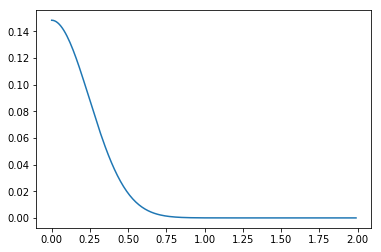

In [80]:
xs, ys = diffusion_at_t(0.03)
plt.plot(xs, ys)